In [1]:
import pandas as pd
data=pd.read_csv("/content/TitanicSurvival.csv")
print(data)

        id survived     sex      age passengerClass
0        1      yes  female  29.0000            1st
1        2      yes    male   0.9167            1st
2        3       no  female   2.0000            1st
3        4       no    male  30.0000            1st
4        5       no  female  25.0000            1st
...    ...      ...     ...      ...            ...
1304  1305       no  female  14.5000            3rd
1305  1306       no  female      NaN            3rd
1306  1307       no    male  26.5000            3rd
1307  1308       no    male  27.0000            3rd
1308  1309       no    male  29.0000            3rd

[1309 rows x 5 columns]


In [2]:
data.isna().sum()

id                  0
survived            0
sex                 0
age               263
passengerClass      0
dtype: int64

In [7]:
data["age"]=data["age"].fillna(0)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['passengerClass']=le.fit_transform(data['passengerClass'])
data['survived']=le.fit_transform(data['survived'])
print(data)

        id  survived  sex  age  passengerClass
0        1         1    0    0               0
1        2         1    1    1               0
2        3         0    0    0               0
3        4         0    1    1               0
4        5         0    0    0               0
...    ...       ...  ...  ...             ...
1304  1305         0    0    0               2
1305  1306         0    0    0               2
1306  1307         0    1    1               2
1307  1308         0    1    1               2
1308  1309         0    1    1               2

[1309 rows x 5 columns]


In [13]:
x=data.drop("passengerClass",axis=1)
y=data["passengerClass"]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

        id  survived  sex  age
1041  1042         0    1    1
17      18         1    0    0
1302  1303         0    1    1
1247  1248         1    0    0
368    369         0    1    1
...    ...       ...  ...  ...
469    470         1    0    0
571    572         0    1    1
668    669         0    1    1
12      13         1    0    0
144    145         1    0    0

[1282 rows x 4 columns]
1041    2
17      0
1302    2
1247    2
368     1
       ..
469     1
571     1
668     2
12      0
144     0
Name: passengerClass, Length: 1282, dtype: int64


In [15]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
c=br.predict([[1310,0,1,20]])
print(c)

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


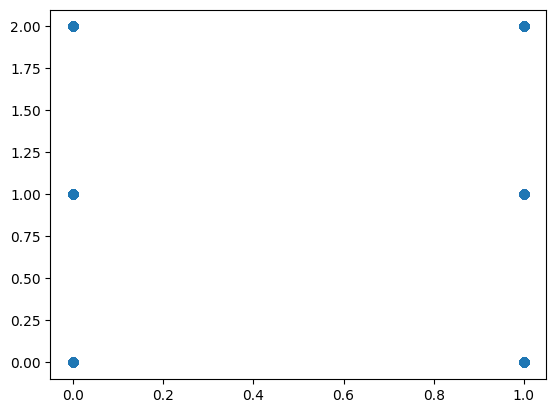

In [18]:
from matplotlib import pyplot as plt
plt.scatter(data["survived"],data["passengerClass"])
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[ 7  1  0]
 [ 1  4  0]
 [ 0  0 14]]


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9259259259259259


In [22]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00        14

    accuracy                           0.93        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.93      0.93      0.93        27

